In [1]:
import pandas as pd
import numpy as np

In [2]:
housem = pd.read_csv("housing.csv")

In [3]:
housem.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  503 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    503 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housem['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housem.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,505.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,503.000000,506.000000,503.000000,505.000000
mean,3.613524,11.363636,11.115485,0.069170,0.554695,6.286050,68.574901,3.795043,9.549407,408.237154,18.459841,356.674032,12.636879,22.539406
std,8.601545,23.322453,6.850397,0.253994,0.115878,0.703027,28.148861,2.105710,8.707259,168.537116,2.169652,91.294864,7.124722,9.205024
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.970000,17.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.100000,391.440000,11.340000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

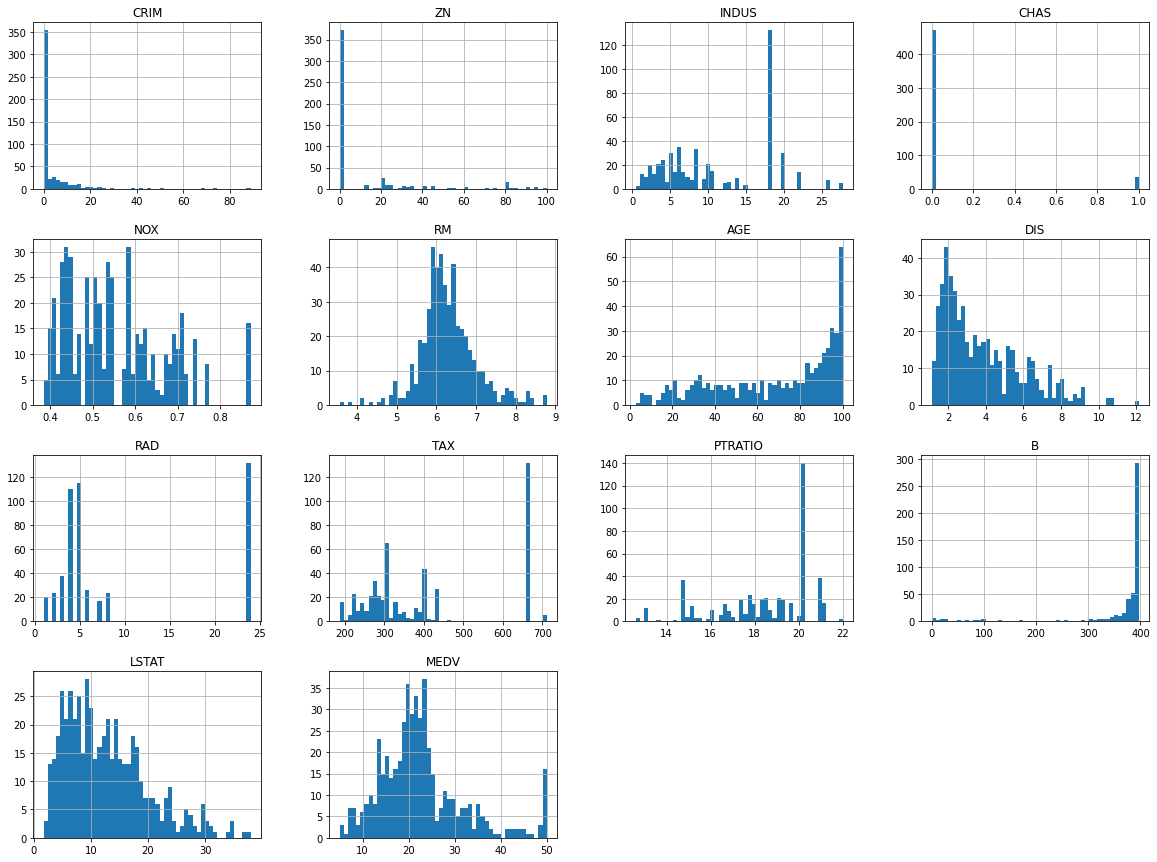

In [9]:
housem.hist(bins=50, figsize=(20,15))

## missing values

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housem)

SimpleImputer(strategy='median')

In [11]:
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.91000e+01, 3.91440e+02, 1.13400e+01, 2.12000e+01])

In [12]:
x = imputer.transform(housem)

In [13]:
house =pd.DataFrame(x, columns=housem.columns)

In [14]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.112668,0.069170,0.554695,6.285289,68.574901,3.795043,9.549407,408.237154,18.463636,356.674032,12.629190,22.536759
std,8.601545,23.322453,6.843905,0.253994,0.115878,0.699580,28.148861,2.105710,8.707259,168.537116,2.163757,91.294864,7.104227,9.196099
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,7.037500,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.100000,391.440000,11.340000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.930000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Train-Test Splitting

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house, test_size=0.2, random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set:404
Rows in test set:102


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(house, house['CHAS']):
    strat_train_set= house.loc[train_index]
    strat_test_set= house.loc[test_index]

In [17]:
strat_test_set['CHAS'].value_counts()

0.0    95
1.0     7
Name: CHAS, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [19]:
house = strat_train_set.copy()

## Looking for correlations

In [20]:
corr_matrix = house.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.674517
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.494416
LSTAT     -0.735354
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

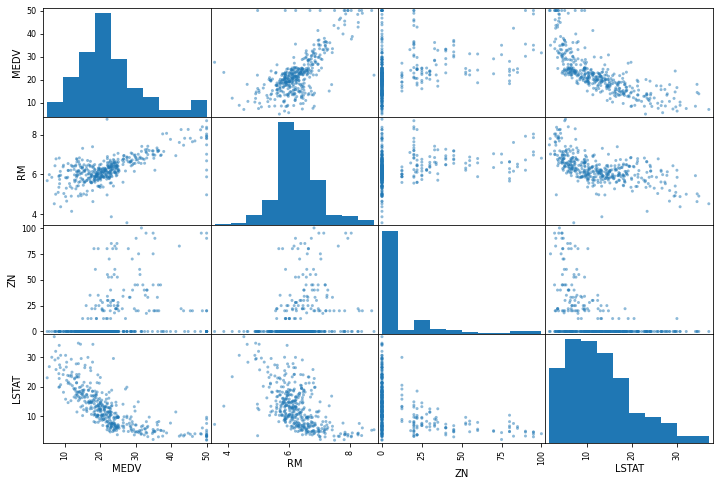

In [22]:
from pandas.plotting import scatter_matrix
att = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(house[att],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

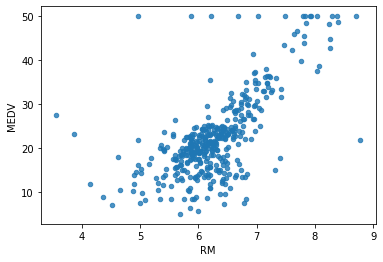

In [23]:
house.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying Out Attribute combinations

In [24]:
house["TAXRM"] = house['TAX']/house['RM']

In [25]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix2 = house.corr()
corr_matrix2['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.674517
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.494416
TAXRM     -0.523832
LSTAT     -0.735354
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

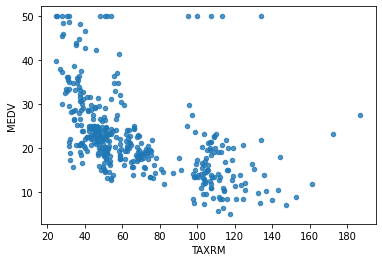

In [27]:
 house.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [28]:
house = strat_train_set.drop("MEDV" , axis=1)
house_labels = strat_train_set["MEDV"].copy()

## creating a pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline ([('imputer', SimpleImputer(strategy='median')),('std_scaler', StandardScaler()),])

In [30]:
house_num_tr = my_pipeline.fit_transform(house)

In [31]:
house_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97667395,
         0.41164221, -0.86213623],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69456508,
         0.39131918, -0.94289569],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81001558,
         0.44624347,  0.82406568],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22438363,
         0.41831233, -1.27985759],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81001558,
        -3.15239177,  0.74748343],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97667395,
         0.41070422,  0.10419253]])

In [32]:
house_num_tr.shape

(404, 13)

## model 1

In [33]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(house_num_tr, house_labels)

LinearRegression()

In [34]:
some_data = house.iloc[:5]

In [35]:
some_labels = house_labels.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(some_data)

In [37]:
model1.predict(prepared_data)

array([23.99960225, 27.30425295, 20.72932536, 25.0250794 , 23.72242677])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model 1

In [39]:
from sklearn.metrics import mean_squared_error
house_predictions1 = model1.predict(house_num_tr)
mse1 = mean_squared_error(house_labels, house_predictions1)
rmse1 = np.sqrt(mse1)

In [40]:
rmse1

4.875350450392937

## cross validation model 1 

In [41]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, house_num_tr, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores1 =np.sqrt(-scores1)

In [42]:
rmse_scores1

array([4.4619532 , 4.50653116, 5.02359123, 3.92838091, 5.35868301,
       4.24231462, 7.61272479, 5.39807178, 4.15964897, 6.06533783])

In [43]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
print_scores(rmse_scores1)

Scores: [4.4619532  4.50653116 5.02359123 3.92838091 5.35868301 4.24231462
 7.61272479 5.39807178 4.15964897 6.06533783]
Mean: 5.075723749463181
Standard deviation: 1.0560897767936477


## model 2

In [45]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(house_num_tr, house_labels)

DecisionTreeRegressor()

In [46]:
model2.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

## Evaluating the model 2

In [47]:
house_predictions2 = model2.predict(house_num_tr)
mse2 = mean_squared_error(house_labels, house_predictions2)
rmse2 = np.sqrt(mse2)

In [48]:
rmse2

0.0

## cross validation model 2

In [49]:
scores2 = cross_val_score(model2, house_num_tr, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores2 =np.sqrt(-scores2)

In [50]:
rmse_scores2

array([7.03799791, 6.15637682, 4.7875601 , 3.74449189, 4.45785823,
       3.49034382, 7.25768558, 3.87856288, 4.99382118, 3.47918812])

In [51]:
print_scores(rmse_scores2)

Scores: [7.03799791 6.15637682 4.7875601  3.74449189 4.45785823 3.49034382
 7.25768558 3.87856288 4.99382118 3.47918812]
Mean: 4.928388654629291
Standard deviation: 1.3528283022108691


## model 3

In [52]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(house_num_tr, house_labels)

RandomForestRegressor()

In [53]:
model3.predict(prepared_data)

array([22.353, 25.579, 16.519, 23.357, 23.457])

## Evaluating the model 3

In [54]:
house_predictions3 = model3.predict(house_num_tr)
mse3 = mean_squared_error(house_labels, house_predictions3)
rmse3 = np.sqrt(mse3)

In [55]:
rmse3

1.292476736294075

## cross validation model 3

In [56]:
scores3 = cross_val_score(model3, house_num_tr, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores3 =np.sqrt(-scores3)

In [57]:
rmse_scores3

array([3.59685107, 3.91552214, 4.25629371, 2.5656377 , 3.23067415,
       2.75693906, 5.3181061 , 3.28097571, 3.64575514, 3.09508107])

In [58]:
print_scores(rmse_scores3)

Scores: [3.59685107 3.91552214 4.25629371 2.5656377  3.23067415 2.75693906
 5.3181061  3.28097571 3.64575514 3.09508107]
Mean: 3.5661835861716646
Standard deviation: 0.7580640122114035


## Saving the best model

In [59]:
from joblib import dump, load
dump(model3, 'realestate.joblib')

['realestate.joblib']

## testing the model

In [60]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model3.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse= np.sqrt(final_mse)

In [61]:
final_rmse

3.019594134199844